<a href="https://colab.research.google.com/github/SravyaSriDatla/Avocado-Sales/blob/main/comparingModels_Dagshub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

#importing the dataset
data = pd.read_csv('avocado.csv',index_col=0)

# Check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [2]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<Axes: xlabel='AveragePrice', ylabel='Density'>

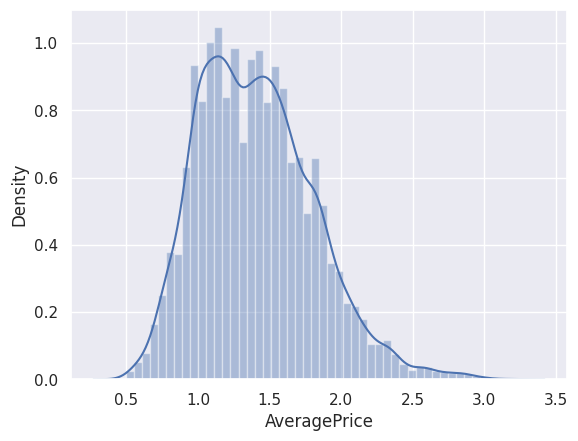

In [3]:
sns.distplot(data['AveragePrice'])

<Axes: xlabel='year', ylabel='count'>

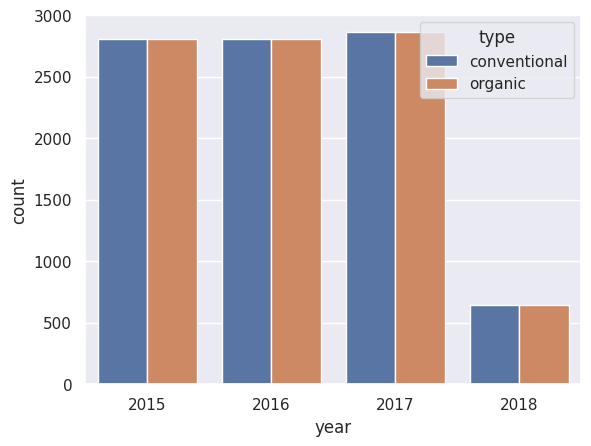

In [4]:
sns.countplot(x='year',data=data,hue='type')

In [5]:
data.year.value_counts()

,count
year,
2017,5722
2016,5616
2015,5615
2018,1296


<Axes: xlabel='AveragePrice', ylabel='type'>

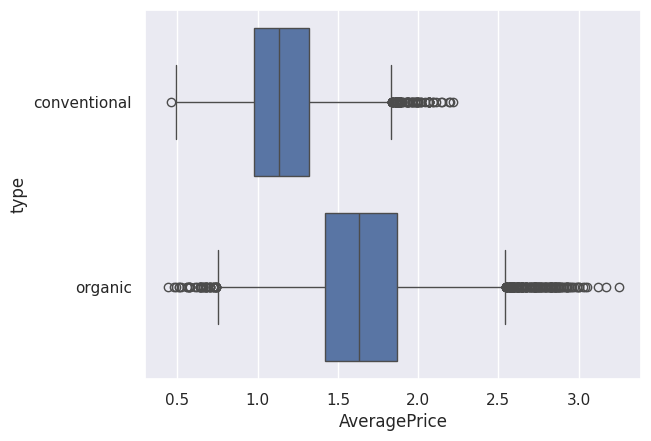

In [6]:
sns.boxplot(y="type", x="AveragePrice", data=data)

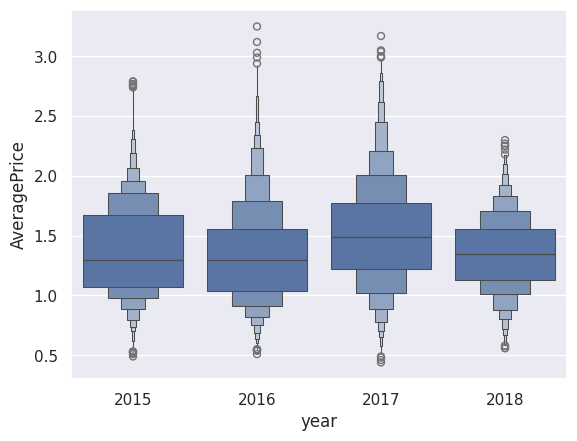

In [7]:
data.year=data.year.apply(str)
sns.boxenplot(x="year", y="AveragePrice", data=data);

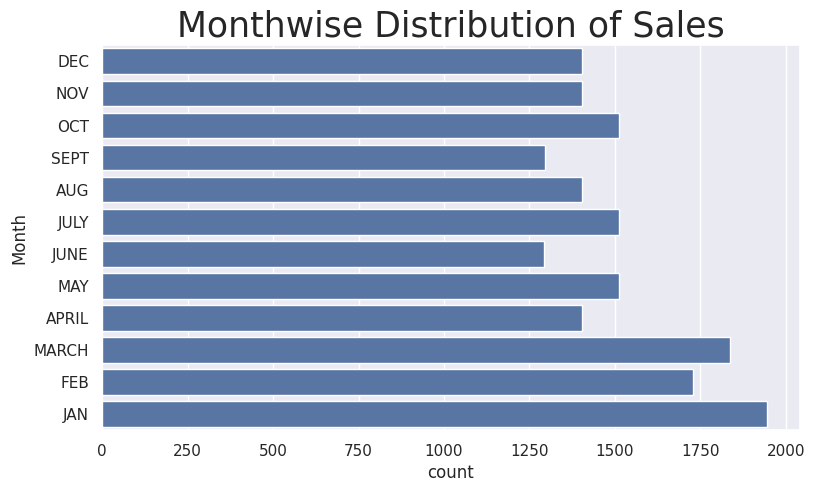

In [8]:
#dealing with categorical data

data['type']= data['type'].map({'conventional':0,'organic':1})

# Extracting month from date column.
data.Date = data.Date.apply(pd.to_datetime)
data['Month']=data['Date'].apply(lambda x:x.month)
data.drop('Date',axis=1,inplace=True)
data.Month = data.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

plt.figure(figsize=(9,5))
sns.countplot(data['Month'])
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25});

In [9]:
#preparing data for ml models

# Creating dummy variables
dummies = pd.get_dummies(data[['year','region','Month']],drop_first=True)
df_dummies = pd.concat([data[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
target = data['AveragePrice']

# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,target,test_size=0.30)

# Standardizing the data
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

In [10]:
#importing ML models from scikit-learn

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [13]:
pip install dagshub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.2/258.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 3.5 MB/s eta 0:00:00


In [16]:
pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.3/28.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 637.5/637.5 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.6 MB/s eta 0:00:00


In [17]:
import mlflow
import mlflow.sklearn
import mlflow.xgboost

#dagshub setup

import dagshub
dagshub.init(repo_owner='SravyaSriDatla', repo_name='Avocado-Sales', mlflow=True)

mlflow.set_experiment('Compare Algorithms')
mlflow.set_tracking_uri('https://dagshub.com/SravyaSriDatla/Avocado-Sales.mlflow')

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=c1b8cd42-62bb-486d-94ed-0ece5ab1d073&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=456744be7b6a87bb8be82e6383c9ac8130761c89959422140b1297b9ab1edc94




Accessing as SravyaSriDatla

Initialized MLflow to track repo "SravyaSriDatla/Avocado-Sales"

Repository SravyaSriDatla/Avocado-Sales initialized!

2025/01/25 21:05:14 INFO mlflow.tracking.fluent: Experiment with name 'Compare Algorithms' does not exist. Creating a new experiment.


In [23]:
#to save time all models can be applied once using for loop

regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]
    with mlflow.start_run(run_name=method):
        mlflow.sklearn.log_model(func,method)
        mlflow.log_metrics({'MAE': np.round(mean_absolute_error(y_test,pred),3),
                           'MSE': np.round(mean_squared_error(y_test,pred),3),
                           'R2-score': np.round(r2_score(y_test,pred),3)})

2025/01/25 21:22:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Linear Regression at: https://dagshub.com/SravyaSriDatla/Avocado-Sales.mlflow/#/experiments/0/runs/b9c639442d9343b5ba84b996865d5729
🧪 View experiment at: https://dagshub.com/SravyaSriDatla/Avocado-Sales.mlflow/#/experiments/0


2025/01/25 21:22:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree at: https://dagshub.com/SravyaSriDatla/Avocado-Sales.mlflow/#/experiments/0/runs/5e02ebd8bb654ed6a18102d1a087e6d0
🧪 View experiment at: https://dagshub.com/SravyaSriDatla/Avocado-Sales.mlflow/#/experiments/0


2025/01/25 21:23:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest at: https://dagshub.com/SravyaSriDatla/Avocado-Sales.mlflow/#/experiments/0/runs/1bb89b190df4456ea154fa66561c9eb5
🧪 View experiment at: https://dagshub.com/SravyaSriDatla/Avocado-Sales.mlflow/#/experiments/0


2025/01/25 21:23:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Support Vector Machines at: https://dagshub.com/SravyaSriDatla/Avocado-Sales.mlflow/#/experiments/0/runs/60a46a4b9cee4b78b31708ccfbf1cf7b
🧪 View experiment at: https://dagshub.com/SravyaSriDatla/Avocado-Sales.mlflow/#/experiments/0


2025/01/25 21:24:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run K-nearest Neighbors at: https://dagshub.com/SravyaSriDatla/Avocado-Sales.mlflow/#/experiments/0/runs/424852e44734496e87273db12e019c6a
🧪 View experiment at: https://dagshub.com/SravyaSriDatla/Avocado-Sales.mlflow/#/experiments/0


2025/01/25 21:24:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBoost at: https://dagshub.com/SravyaSriDatla/Avocado-Sales.mlflow/#/experiments/0/runs/f470174057b84c30ad910eb94e3af9ce
🧪 View experiment at: https://dagshub.com/SravyaSriDatla/Avocado-Sales.mlflow/#/experiments/0


In [12]:
results

,MAE,MSE,R2-score
Linear Regression,0.182,0.058,0.644
Decision Tree,0.128,0.040,0.756
Random Forest,0.095,0.018,0.887
Support Vector Machines,0.117,0.027,0.833
K-nearest Neighbors,0.101,0.024,0.854
XGBoost,0.095,0.017,0.894
